In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D

In [2]:
import  warnings
warnings.filterwarnings("ignore")

In [3]:
train_dir = r"C:\Users\Kritika\Downloads\Covid19-dataset\train"
test_dir = r"C:\Users\Kritika\Downloads\Covid19-dataset\test"

In [4]:
img_width , img_height = 512, 512

In [5]:
batch_size = 32

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [7]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
X_train = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 251 images belonging to 3 classes.


In [9]:
X_test = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 66 images belonging to 3 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(3, activation="softmax")
])

In [11]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
history = model.fit(X_train,epochs=30,validation_data=X_test)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 215s 26s/step - accuracy: 0.3910 - loss: 2.5897 - val_accuracy: 0.3030 - val_loss: 1.1144
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 350s 42s/step - accuracy: 0.3984 - loss: 1.0282 - val_accuracy: 0.5758 - val_loss: 0.9282
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 323s 38s/step - accuracy: 0.7574 - loss: 0.6972 - val_accuracy: 0.5152 - val_loss: 1.1242
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 332s 38s/step - accuracy: 0.6632 - loss: 0.7291 - val_accuracy: 0.6515 - val_loss: 1.1242
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 418s 43s/step - accuracy: 0.7040 - loss: 0.6543 - val_accuracy: 0.6364 - val_loss: 1.1021
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 353s 38s/step - accuracy: 0.8300 - loss: 0.4868 - val_accuracy: 0.4394 - val_loss: 1.5127
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 246s 27s/step - accuracy: 0.7630 - loss: 0.5520 - val_accuracy: 0.5455 - val_loss: 0.9477
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2100s 294s/step - accuracy: 0.7066 - loss: 0.6614 - val_accuracy: 0.6364 - val_los

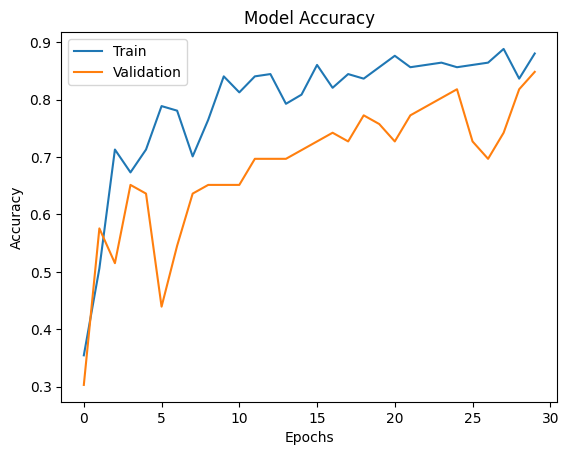

In [15]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

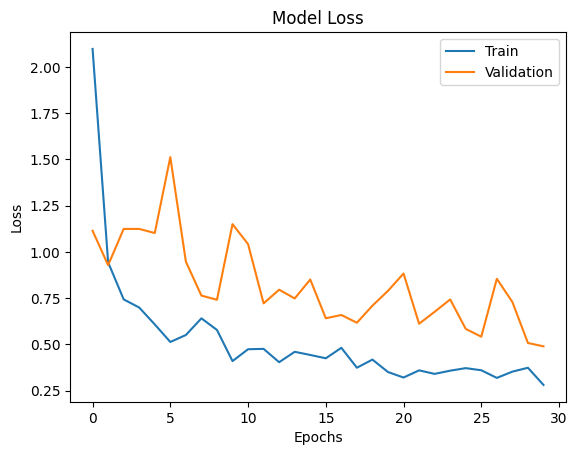

In [16]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()

In [17]:
class_labels = X_train.class_indices

In [18]:
class_names = {value: key for key, value in class_labels.items()}
print("Class Names:", class_names)

Class Names: {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [19]:
from tensorflow.keras.preprocessing import image

In [26]:
img_path = r"C:\Users\Kritika\Downloads\Covid19-dataset\test\Covid\0111.jpg"

In [27]:
img = image.load_img(img_path, target_size=(img_width, img_height))

In [28]:
img_arr = image.img_to_array(img)

In [29]:
img_arr = np.expand_dims(img_arr, axis=0)

In [30]:
img_arr = img_arr / 255.0

In [32]:
pred = model.predict(img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step


In [33]:
pred_class = np.argmax(pred)

In [35]:
class_names[pred_class]

'Covid'

In [36]:
img_path2 = r"C:\Users\Kritika\Downloads\Covid19-dataset\test\Normal\0108.jpeg"

In [37]:
img2 = image.load_img(img_path2, target_size=(img_width, img_height))

In [38]:
img_arr2 = image.img_to_array(img2)

In [39]:
img_arr2 = np.expand_dims(img_arr2, axis=0)

In [40]:
img_arr2 = img_arr2 / 255.0

In [41]:
pred2 = model.predict(img_arr2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


In [42]:
pred_class2 = np.argmax(pred2)

In [43]:
class_names[pred_class2]

'Normal'

In [44]:
img_path3 = r"C:\Users\Kritika\Downloads\Covid19-dataset\test\Viral Pneumonia\0120.jpeg"

In [45]:
img3 = image.load_img(img_path3, target_size=(img_width, img_height))

In [46]:
img_arr3 = image.img_to_array(img3)

In [47]:
img_arr3 = np.expand_dims(img_arr3, axis=0)

In [48]:
img_arr3 = img_arr3 / 255.0

In [49]:
pred3 = model.predict(img_arr3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [50]:
pred_class3 = np.argmax(pred3)

In [51]:
class_names[pred_class3]

'Viral Pneumonia'